In [1]:
# Load Libs
import os
import numpy as np
import pandas as pd
from fancyimpute import KNN
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using Theano backend.


In [2]:
# set working dir
os.chdir('D:\\DATA SCIENCE STUDY METERIAL\\Projects\\Employee Absenteeism_Project')
os.getcwd()

'D:\\DATA SCIENCE STUDY METERIAL\\Projects\\Employee Absenteeism_Project'

In [3]:
#load dataset
df=pd.read_excel('DATA set.xls')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


# 1.3.	Exploratory Data Analysis

In [4]:
print(df.shape)
print(df.info())


(740, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null flo

In [5]:
# drop the observation where Absenteeism time in hour is NAN
df=df.drop(df[df['Absenteeism time in hours'].isnull()].index)
df=df.drop(df[df['Month of absence']==0].index)
print( df.shape)
print(df.info())

(715, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 736
Data columns (total 21 columns):
ID                                 715 non-null int64
Reason for absence                 712 non-null float64
Month of absence                   714 non-null float64
Day of the week                    715 non-null int64
Seasons                            715 non-null int64
Transportation expense             709 non-null float64
Distance from Residence to Work    712 non-null float64
Service time                       712 non-null float64
Age                                713 non-null float64
Work load Average/day              707 non-null float64
Hit target                         709 non-null float64
Disciplinary failure               710 non-null float64
Education                          705 non-null float64
Son                                709 non-null float64
Social drinker                     712 non-null float64
Social smoker                      711 non-null flo

In [6]:
col=df.columns
print(col)
cat_var=['ID','Reason for absence', 'Month of absence', 'Day of the week','Seasons','Disciplinary failure',
         'Education', 'Son', 'Social drinker','Social smoker', 'Pet']
con_var=['Transportation expense', 'Distance from Residence to Work','Service time', 'Age',
         'Work load Average/day ', 'Hit target','Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']


Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')



# 2.1.	Data Preprocessing	

## 2.1.1.	Missing Value Analysis	

In [7]:
#missing val

missing_val=pd.DataFrame(df.isnull().sum()).reset_index()
missing_val=missing_val.rename(columns={'index':'variable',0:'missing_count'})
missing_val['missing_Per']=(missing_val['missing_count']*100)/len(df)
missing_val.sort_values(by='missing_Per',ascending=False).reset_index(drop=True)

,variable,missing_count,missing_Per
0,Body mass index,29,4.055944
1,Height,14,1.958042
2,Education,10,1.398601
3,Work load Average/day,8,1.118881
4,Hit target,6,0.839161
5,Son,6,0.839161
6,Transportation expense,6,0.839161
7,Disciplinary failure,5,0.699301
8,Social smoker,4,0.559441
9,Distance from Residence to Work,3,0.419580


In [8]:
data=df.copy()  # make a copy of data

In [9]:
data['Body mass index'][0]

#actual value= 30.0
#by mean=26.68
#by median=25.0
#by KNN = 29.13

30.0

In [10]:
# Replace NA with mean
data['Body mass index'][0]=np.nan
data['Body mass index']=data['Body mass index'].fillna(data['Body mass index'].mean())
data['Body mass index'][0]


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


26.681751824817518

In [11]:
# Replace NA with mean
data['Body mass index'][0]=np.nan
data['Body mass index']=data['Body mass index'].fillna(data['Body mass index'].median())
data['Body mass index'][0]

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


25.0

In [12]:
# Replace NA with KNN
data['Body mass index'][0]=np.nan
data=pd.DataFrame(KNN(k=5).fit_transform(data),columns=data.columns)
data['Body mass index'][0]

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Imputing row 1/715 with 1 missing, elapsed time: 0.190
Imputing row 101/715 with 0 missing, elapsed time: 0.194
Imputing row 201/715 with 0 missing, elapsed time: 0.197
Imputing row 301/715 with 0 missing, elapsed time: 0.199
Imputing row 401/715 with 0 missing, elapsed time: 0.200
Imputing row 501/715 with 1 missing, elapsed time: 0.202
Imputing row 601/715 with 0 missing, elapsed time: 0.203
Imputing row 701/715 with 0 missing, elapsed time: 0.204


29.130811489494757

In [13]:
#convert data into proper data type after KNN imputation
for i in col:
    data[i]=data[i].astype(int)

for i in cat_var:
    data[i]=data[i].astype(object)
    


In [14]:
# data after missing value treatment by KNN
df=data.copy()
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

## 2.1.2.	Outlier Analysis

Transportation expense


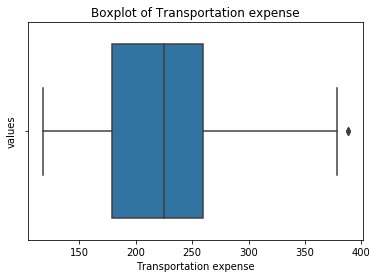

Distance from Residence to Work


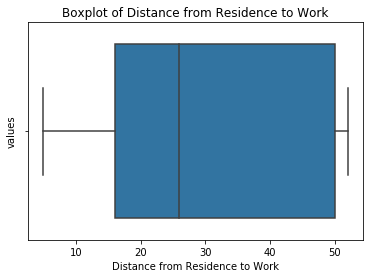

Service time


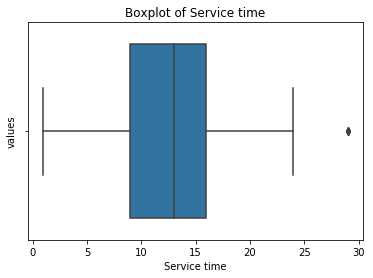

Age


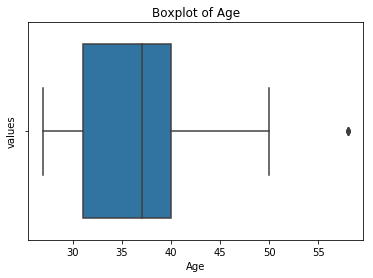

Work load Average/day 


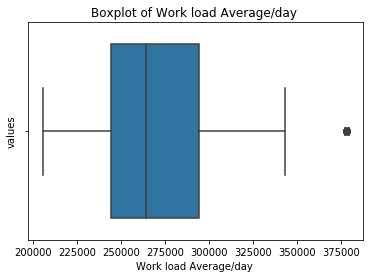

Hit target


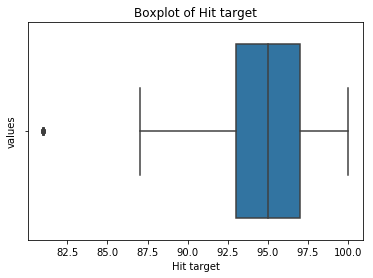

Weight


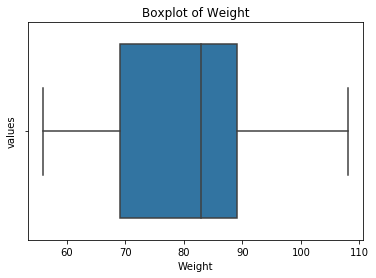

Height


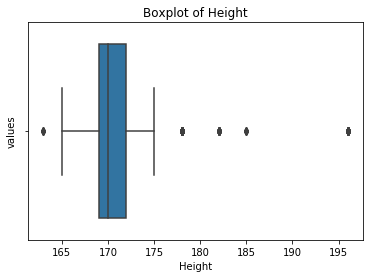

Body mass index


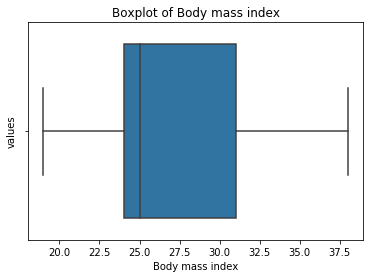

Absenteeism time in hours


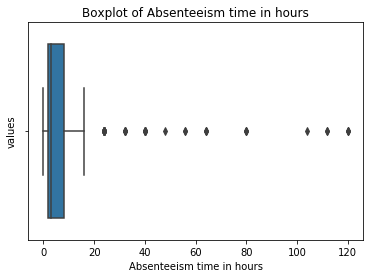

In [15]:
#create Box plot for outlier analysis
for i in con_var:
    print(i)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()


In [16]:
#calculate iqr, lower fence and upper fence-
for i in con_var:
    print(i)
    q75,q25= np.percentile(data.loc[:,i],[75,25])
    iqr= q75-q25
    minimum= q25-(iqr*1.5)
    maximum= q75+(iqr*1.5)
    print("min= "+str(minimum))
    print("max= "+str(maximum))
    print("IQR= "+str(iqr))
    
#replace outliers with NA-   

    data.loc[df[i]<minimum,i]=np.nan
    data.loc[df[i]>maximum,i]=np.nan  

Transportation expense
min= 57.5
max= 381.5
IQR= 81.0
Distance from Residence to Work
min= -35.0
max= 101.0
IQR= 34.0
Service time
min= -1.5
max= 26.5
IQR= 7.0
Age
min= 17.5
max= 53.5
IQR= 9.0
Work load Average/day 
min= 169642.0
max= 368962.0
IQR= 49830.0
Hit target
min= 87.0
max= 103.0
IQR= 4.0
Weight
min= 39.0
max= 119.0
IQR= 20.0
Height
min= 164.5
max= 176.5
IQR= 3.0
Body mass index
min= 13.5
max= 41.5
IQR= 7.0
Absenteeism time in hours
min= -7.0
max= 17.0
IQR= 6.0


In [17]:
#impute outlier with KNN

data=pd.DataFrame(KNN(k=5).fit_transform(data),columns=data.columns)

Imputing row 1/715 with 0 missing, elapsed time: 0.205
Imputing row 101/715 with 0 missing, elapsed time: 0.207
Imputing row 201/715 with 1 missing, elapsed time: 0.209
Imputing row 301/715 with 0 missing, elapsed time: 0.215
Imputing row 401/715 with 0 missing, elapsed time: 0.217
Imputing row 501/715 with 0 missing, elapsed time: 0.218
Imputing row 601/715 with 2 missing, elapsed time: 0.220
Imputing row 701/715 with 0 missing, elapsed time: 0.222


In [18]:
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [19]:
#convert data into proper data type after KNN imputation
for i in col:
    data[i]=data[i].astype(int)

for i in cat_var:
    data[i]=data[i].astype(object)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 21 columns):
ID                                 715 non-null object
Reason for absence                 715 non-null object
Month of absence                   715 non-null object
Day of the week                    715 non-null object
Seasons                            715 non-null object
Transportation expense             715 non-null int32
Distance from Residence to Work    715 non-null int32
Service time                       715 non-null int32
Age                                715 non-null int32
Work load Average/day              715 non-null int32
Hit target                         715 non-null int32
Disciplinary failure               715 non-null object
Education                          715 non-null object
Son                                715 non-null object
Social drinker                     715 non-null object
Social smoker                      715 non-null object
Pet                  

In [20]:
# final data after missing value and outlier analysis

df=data.copy()
df.to_csv("Data after missing value and outlier.csv",index=False)

## 2.1.3.	Data observation

In [21]:
df[con_var].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transportation expense,715.0,220.053147,65.197910,118.0,179.0,225.0,260.0,378.0
Distance from Residence to Work,715.0,29.558042,14.785409,5.0,16.0,26.0,50.0,52.0
Service time,715.0,12.461538,4.157220,1.0,9.0,12.0,16.0,24.0
Age,715.0,36.139860,6.062699,27.0,31.0,37.0,40.0,50.0
Work load Average/day,715.0,267256.806993,32309.365234,205917.0,244387.0,264249.0,284853.0,343253.0
Hit target,715.0,94.920280,3.092517,87.0,93.0,95.0,97.0,100.0
Weight,715.0,79.006993,12.850954,56.0,69.0,83.0,89.0,108.0
Height,715.0,170.078322,1.772658,165.0,169.0,170.0,171.0,175.0
Body mass index,715.0,26.657343,4.192338,19.0,24.0,25.0,31.0,38.0
Absenteeism time in hours,715.0,4.346853,3.388475,0.0,2.0,3.0,8.0,16.0


In [22]:
#df[cat_var].describe().transpose()
#unique values
for i in cat_var:
    print('variable {} having {} unique values that are:{}'.format(i,df[i].nunique(),df[i].sort_values().unique()))
    #print(df[i].value_counts())


variable ID having 34 unique values that are:[1 2 3 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 36]
variable Reason for absence having 28 unique values that are:[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28]
variable Month of absence having 12 unique values that are:[1 2 3 4 5 6 7 8 9 10 11 12]
variable Day of the week having 5 unique values that are:[2 3 4 5 6]
variable Seasons having 4 unique values that are:[1 2 3 4]
variable Disciplinary failure having 2 unique values that are:[0 1]
variable Education having 5 unique values that are:[0 1 2 3 4]
variable Son having 5 unique values that are:[0 1 2 3 4]
variable Social drinker having 2 unique values that are:[0 1]
variable Social smoker having 2 unique values that are:[0 1]
variable Pet having 6 unique values that are:[0 1 2 4 5 8]


In [23]:
pd.set_option('max_info_rows',70)
for i in cat_var:
    print(i)
    print(df[i].sort_values().value_counts())
    

ID
3     111
28     75
34     54
22     46
11     40
20     39
15     37
36     32
14     28
24     28
33     24
10     22
1      22
17     20
5      18
18     15
13     14
25     10
6       8
9       8
12      7
27      6
30      6
7       6
2       6
23      6
29      5
26      5
32      5
21      3
31      3
19      3
16      2
8       1
Name: ID, dtype: int64
Reason for absence
23    146
28    109
27     70
13     54
19     40
22     34
0      33
26     33
25     31
11     25
10     23
18     21
14     18
1      16
7      15
12      8
6       7
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64
Month of absence
3     84
2     72
10    66
7     65
5     62
11    59
6     53
4     53
8     52
9     51
1     50
12    48
Name: Month of absence, dtype: int64
Day of the week
2    159
4    150
3    148
6    135
5    123
Name: Day of the week, dtype: int64
Seasons
2    189
4    184
3    178
1 

## Visualization

Transportation expense


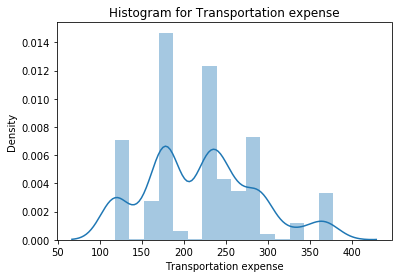

Distance from Residence to Work


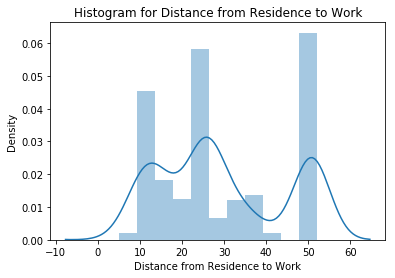

Service time


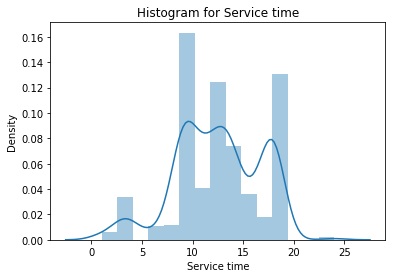

Age


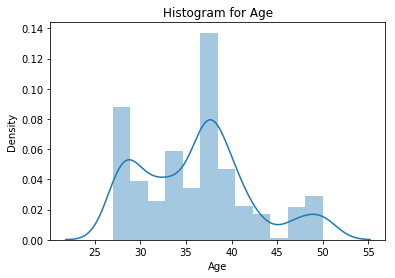

Work load Average/day 


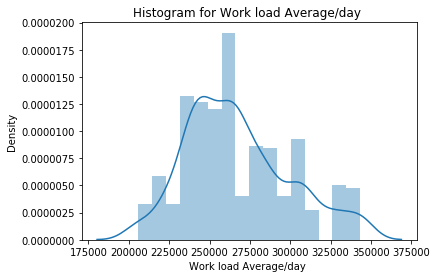

Hit target


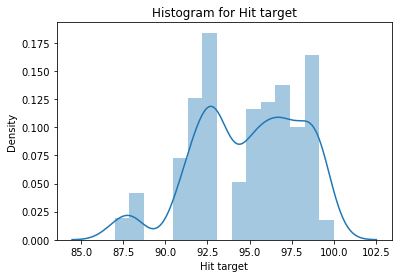

Weight


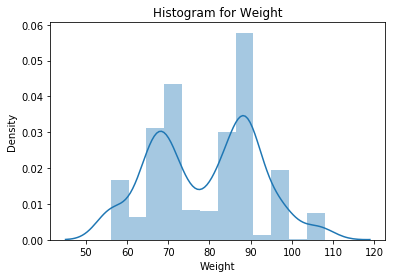

Height


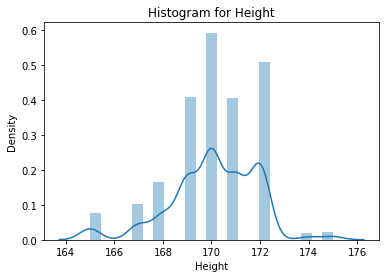

Body mass index


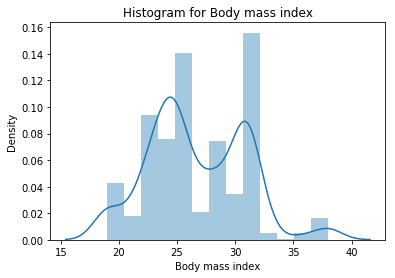

Absenteeism time in hours


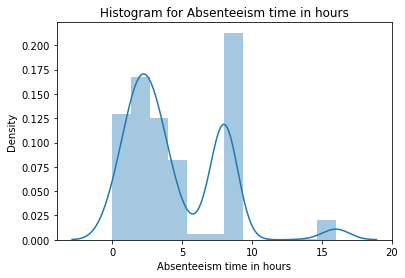

In [24]:
# histogram for continuous variables-
for i in con_var:
    print(i)
    sns.distplot(df[i],bins='auto')
    plt.ylabel('Density')
    plt.title('Histogram for '+i)
    plt.show()

Transportation expense


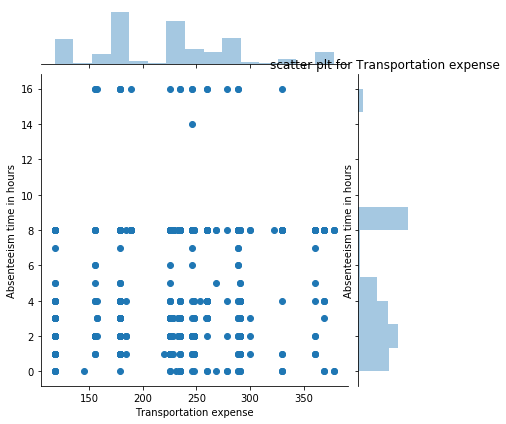

Distance from Residence to Work


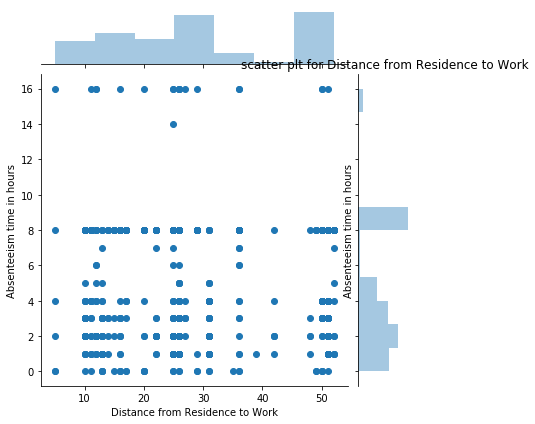

Service time


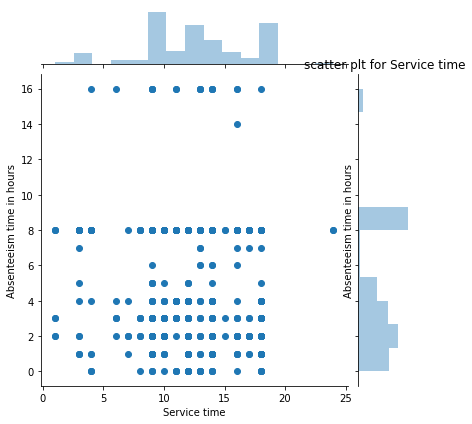

Age


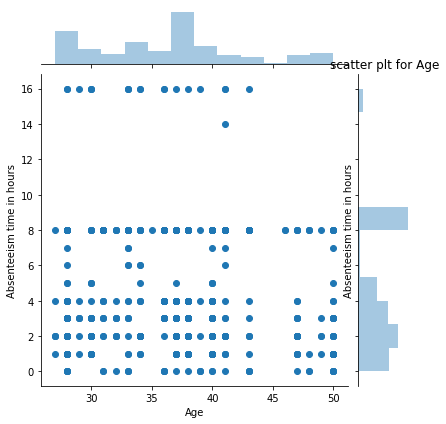

Work load Average/day 


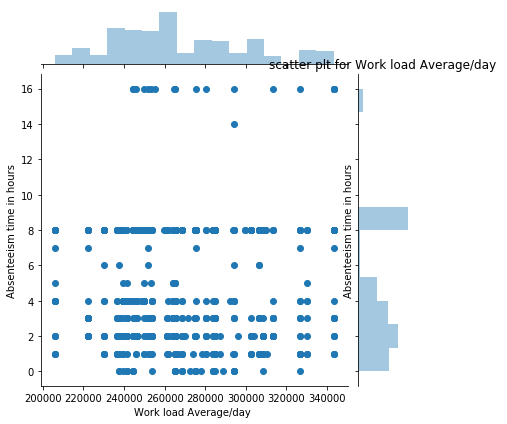

Hit target


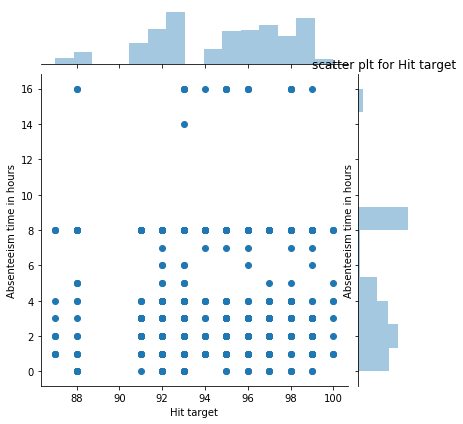

Weight


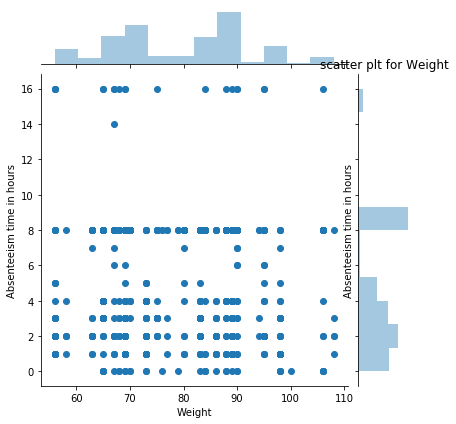

Height


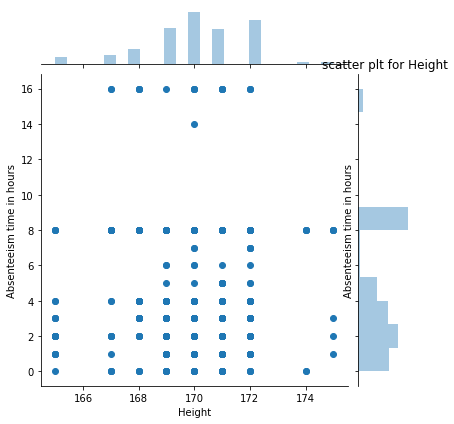

Body mass index


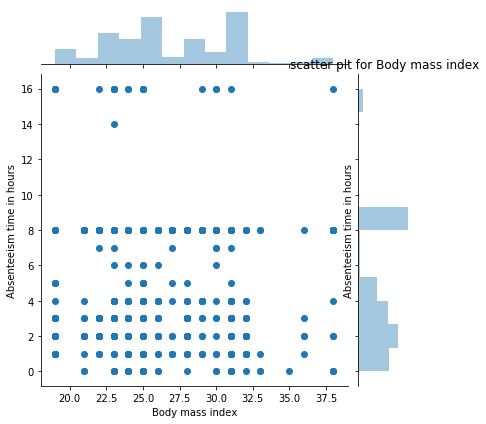

Absenteeism time in hours


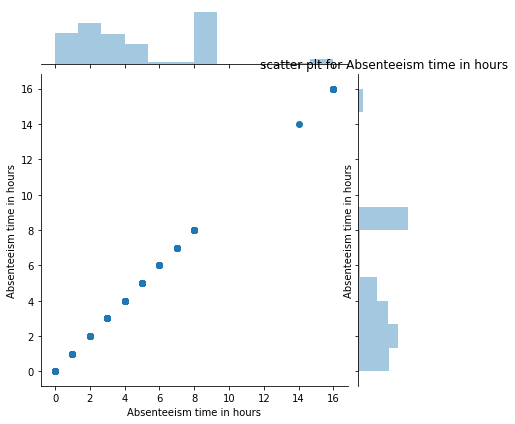

In [25]:
for i in con_var:
    print(i)
    sns.jointplot(x=i,y='Absenteeism time in hours',data= df)
    plt.ylabel('Absenteeism time in hours')
    plt.title('scatter plt for '+i)
    plt.show()
    plt.tight_layout

ID


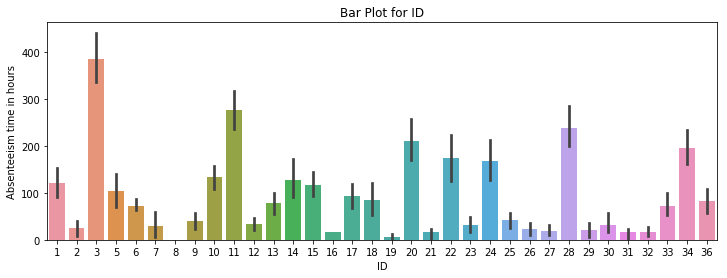

Reason for absence


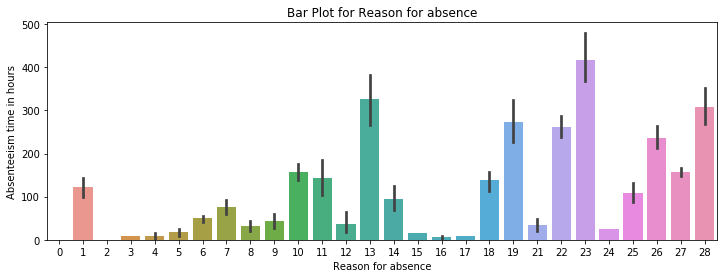

Month of absence


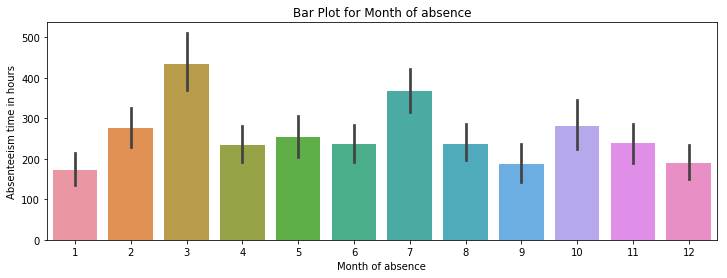

Day of the week


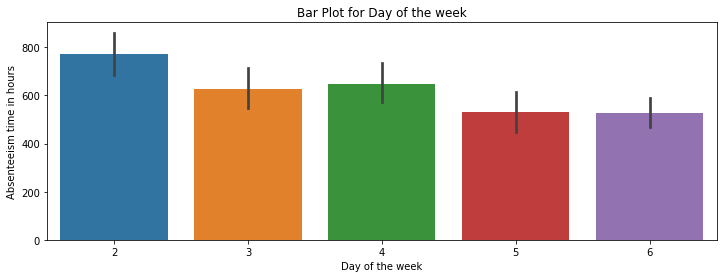

Seasons


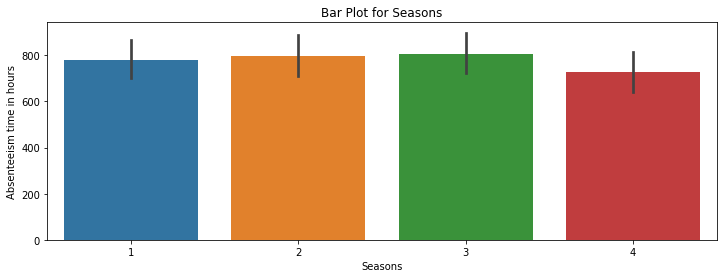

Disciplinary failure


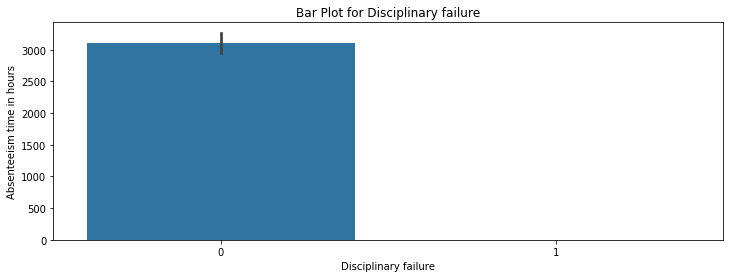

Education


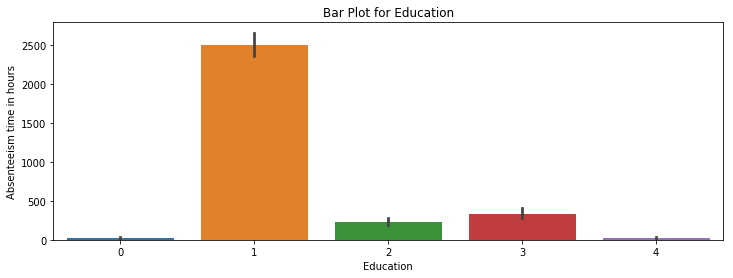

Son


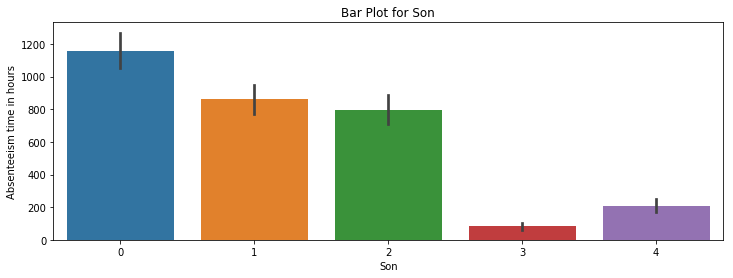

Social drinker


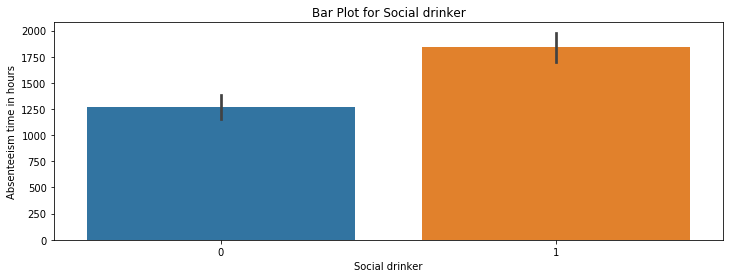

Social smoker


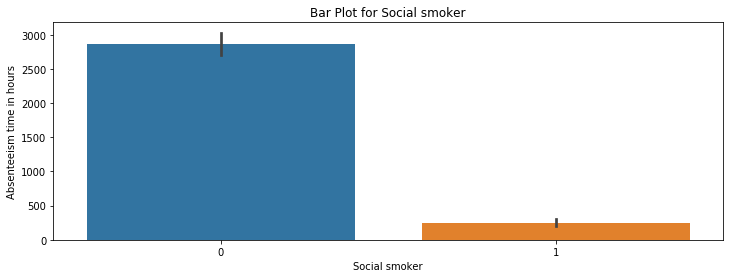

Pet


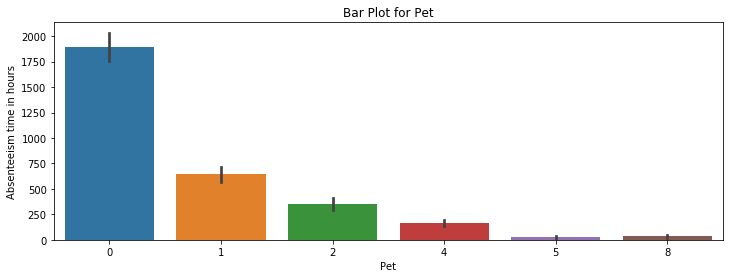

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [26]:
# Bar plot for categorical variables
for i in cat_var:
    print(i)
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize= (12,4), squeeze=False)
    sns.barplot(x=i,y='Absenteeism time in hours',data= df,estimator=np.sum,ax=ax[0][0])
    plt.ylabel('Absenteeism time in hours')
    plt.title('Bar Plot for '+i)
    plt.show()
    plt.tight_layout

plt.tight_layout

ID


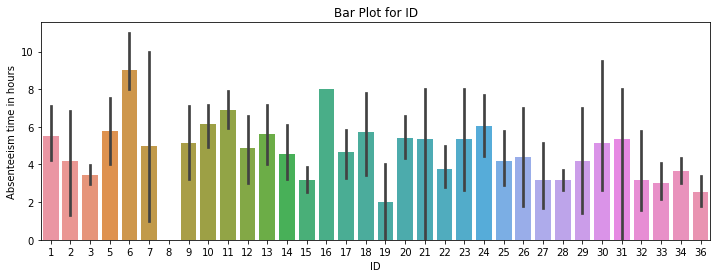

Reason for absence


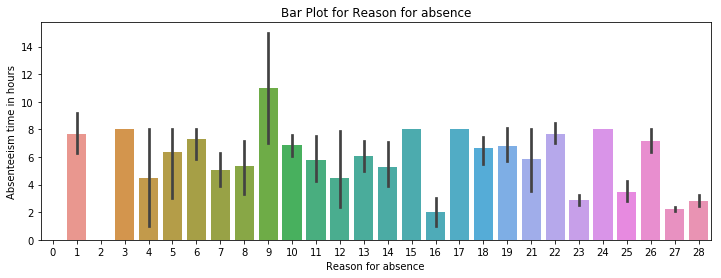

Month of absence


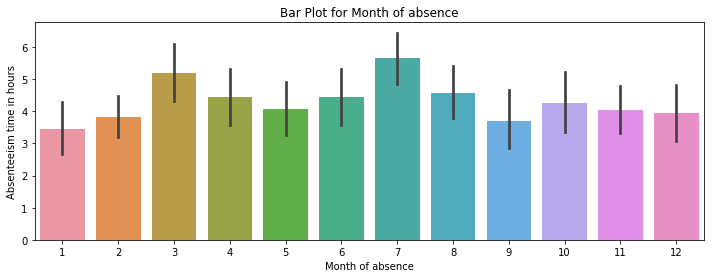

Day of the week


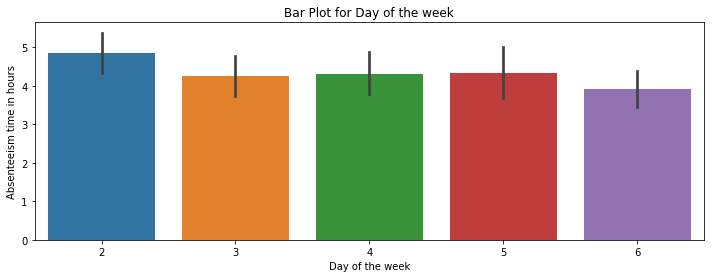

Seasons


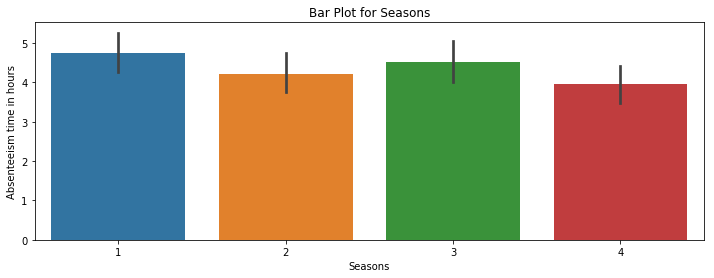

Disciplinary failure


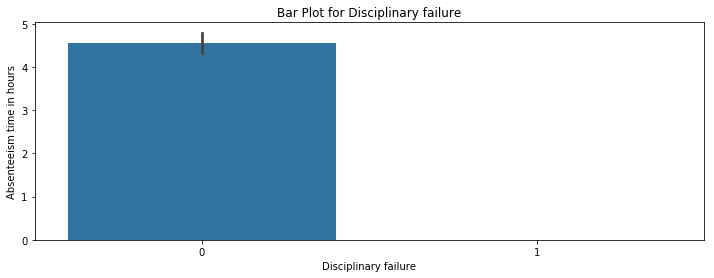

Education


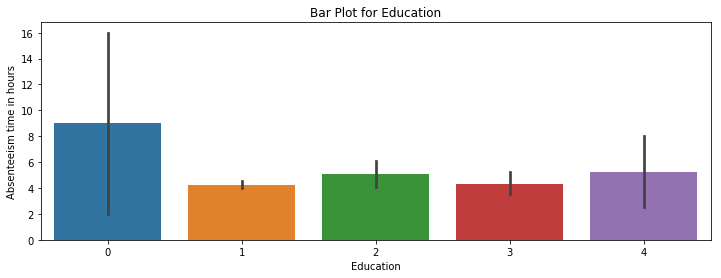

Son


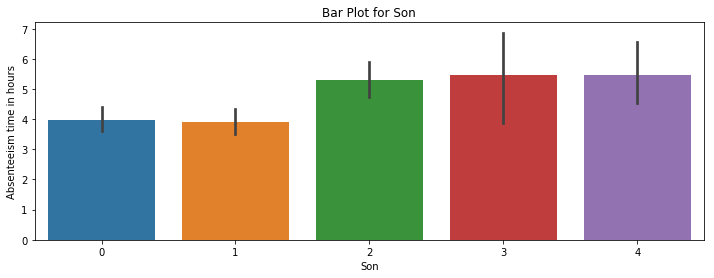

Social drinker


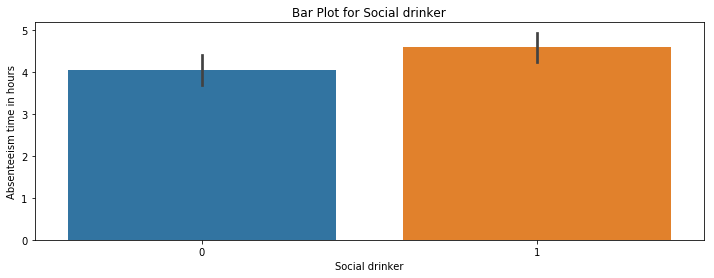

Social smoker


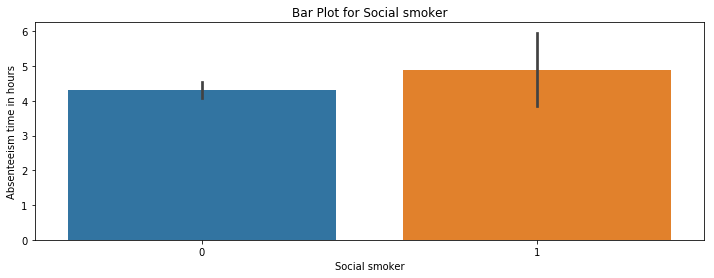

Pet


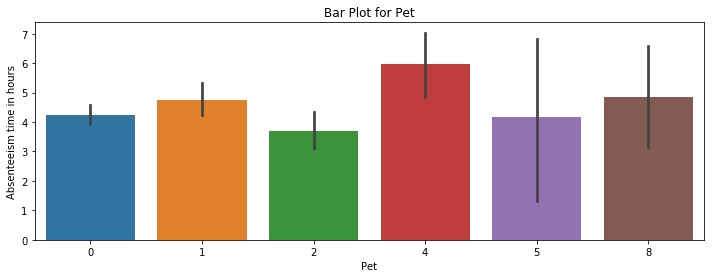

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [27]:
# Bar plot with statistic mean as count is diffrent for levels
for i in cat_var:
    print(i)
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize= (12,4), squeeze=False)
    sns.barplot(x=i,y='Absenteeism time in hours',data= df,estimator=np.mean,ax=ax[0][0])
    plt.ylabel('Absenteeism time in hours')
    plt.title('Bar Plot for '+i)
    plt.show()
    plt.tight_layout

plt.tight_layout

## 2.1.4.	Feature Selection

In [28]:
#correlation analysis for numeric variables-

#extract only numeric variables in dataframe for correlation-
df_corr= df.loc[:,con_var]

#generate correlation matrix-
corr_matrix= df_corr.corr()
corr_matrix

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1.000000,0.265788,-0.384622,-0.266794,-0.020632,-0.088781,-0.196689,-0.026127,-0.118099,0.186840
Distance from Residence to Work,0.265788,1.000000,0.118164,-0.103087,-0.080632,0.020915,-0.032667,-0.104911,0.130728,0.005776
Service time,-0.384622,0.118164,1.000000,0.648482,-0.064559,0.047640,0.420336,-0.036271,0.462882,-0.060496
Age,-0.266794,-0.103087,0.648482,1.000000,-0.059752,-0.020470,0.499783,-0.096415,0.546366,-0.075177
Work load Average/day,-0.020632,-0.080632,-0.064559,-0.059752,1.000000,0.021884,-0.094702,-0.069969,-0.107507,0.052018
Hit target,-0.088781,0.020915,0.047640,-0.020470,0.021884,1.000000,-0.019404,-0.006524,-0.049318,0.016676
Weight,-0.196689,-0.032667,0.420336,0.499783,-0.094702,-0.019404,1.000000,0.070310,0.887139,-0.013404
Height,-0.026127,-0.104911,-0.036271,-0.096415,-0.069969,-0.006524,0.070310,1.000000,-0.090991,0.051665
Body mass index,-0.118099,0.130728,0.462882,0.546366,-0.107507,-0.049318,0.887139,-0.090991,1.000000,-0.026720
Absenteeism time in hours,0.186840,0.005776,-0.060496,-0.075177,0.052018,0.016676,-0.013404,0.051665,-0.026720,1.000000


Text(0.5, 1.0, 'Correlation Plot')

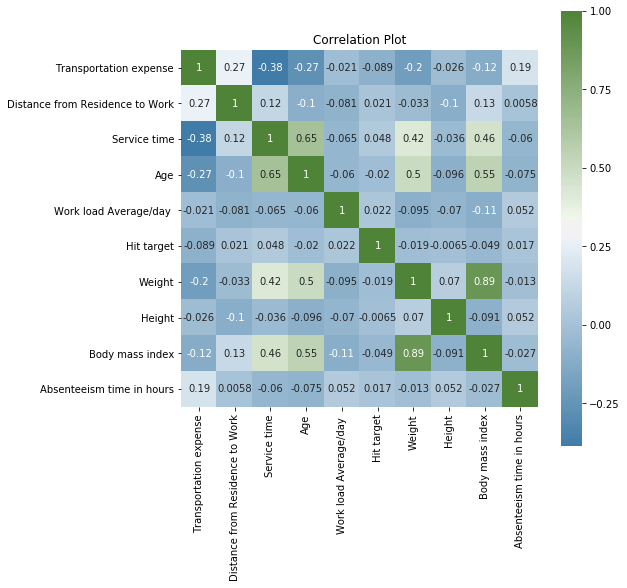

In [29]:
#correlation plot-
f,ax= plt.subplots(figsize=(8,8))

#plot-
sns.heatmap(corr_matrix,mask=np.zeros_like(corr_matrix,dtype=np.bool),cmap=sns.diverging_palette(240,120,as_cmap=True),
           square=True,ax=ax,annot=True)
plt.title("Correlation Plot")

In [30]:
data=df.copy()
# Replacing the white spaces " " in the feature name with "_"
for i in data.columns:
    data = data.rename(index=str, columns={i: i.replace(" ", "_")})
cat_var1=['ID','Reason_for_absence', 'Month_of_absence', 'Day_of_the_week','Seasons',
         'Disciplinary_failure', 'Education', 'Son', 'Social_drinker','Social_smoker', 'Pet']
data.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [31]:
#Anova analysis for categorical variable with target numeric variable

import statsmodels.api as sm
from statsmodels.formula.api import ols

label = 'Absenteeism_time_in_hours'
for  i in cat_var1:
    frame = label + ' ~ ' + i
    model = ols(frame,data=data).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    print(anova)  


               sum_sq     df        F        PR(>F)
ID        1274.897076   33.0  3.80022  1.951747e-11
Residual  6923.083343  681.0      NaN           NaN
                         sum_sq     df          F        PR(>F)
Reason_for_absence  3467.035149   27.0  18.646756  8.085474e-65
Residual            4730.945271  687.0        NaN           NaN
                       sum_sq     df         F    PR(>F)
Month_of_absence   270.456504   11.0  2.180331  0.013903
Residual          7927.523915  703.0       NaN       NaN
                      sum_sq     df         F    PR(>F)
Day_of_the_week    67.287858    4.0  1.468952  0.209862
Residual         8130.692562  710.0       NaN       NaN
               sum_sq     df         F    PR(>F)
Seasons     62.512894    3.0  1.821107  0.141888
Residual  8135.467525  711.0       NaN       NaN
                           sum_sq     df          F        PR(>F)
Disciplinary_failure   653.710625    1.0  61.781417  1.418044e-14
Residual              7544.269795 

## 2.1.5.	Feature Scaling  

In [32]:
#as the variables are not unifomaly distributed we use normalization for Feature scaling
#Normalization-

for i in con_var:
    print(i)
    df[i]= (df[i]-min(df[i]))/(max(df[i])-min(df[i]))
    print(df[i])

Transportation expense
0      0.657692
1      0.000000
2      0.234615
3      0.619231
4      0.657692
5      0.784615
6      0.546154
7      0.142308
8      0.450000
9      0.546154
10     0.546154
11     0.546154
12     0.234615
13     0.234615
14     0.234615
15     0.234615
16     0.273077
17     0.500000
18     0.234615
19     0.934615
20     0.546154
21     0.657692
22     0.934615
23     0.657692
24     0.150000
25     0.657692
26     0.234615
27     0.234615
28     0.450000
29     0.519231
         ...   
685    0.234615
686    0.000000
687    0.000000
688    1.000000
689    0.000000
690    0.442308
691    0.234615
692    0.450000
693    0.576923
694    0.000000
695    0.234615
696    0.665385
697    0.234615
698    0.000000
699    0.442308
700    0.000000
701    0.000000
702    0.442308
703    0.450000
704    0.442308
705    0.423077
706    0.000000
707    0.423077
708    0.273077
709    0.000000
710    0.934615
711    0.411538
712    0.965385
713    0.657692
714    0.450000
N

Name: Absenteeism time in hours, dtype: float64


## 2.1.6.	Data after EDA and preprocessing   

In [33]:
df = df.drop(["Weight","Day of the week","Social smoker","Education","Seasons"],axis=1)

In [34]:
print(df.shape)
print(df.info())

(715, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 16 columns):
ID                                 object
Reason for absence                 object
Month of absence                   object
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               object
Son                                object
Social drinker                     object
Pet                                object
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtypes: float64(9), object(7)
memory usage: 89.5+ KB
None


In [35]:
df.shape
df.to_csv("Absenteeism_Pre_processed_Data.csv",index=False)
df.head()

,ID,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Pet,Height,Body mass index,Absenteeism time in hours
0,11,26,7,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0,2,1,1,0.7,0.526316,0.250
1,36,0,7,0.000000,0.170213,0.739130,1.000000,0.244925,0.769231,1,1,1,0,0.5,0.631579,0.000
2,3,23,7,0.234615,0.978723,0.739130,0.478261,0.244925,0.769231,0,0,1,0,0.5,0.631579,0.125
3,7,7,7,0.619231,0.000000,0.565217,0.521739,0.244925,0.769231,0,2,1,0,0.3,0.263158,0.250
4,11,23,7,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0,2,1,1,0.7,0.578947,0.125


# 2.2.	Model Development

## 2.2.1.	Models building

In [36]:
# change categorical to numeric making bin for regression model
df= pd.get_dummies(df,columns=['ID','Reason for absence', 'Month of absence','Disciplinary failure',
          'Son', 'Social drinker', 'Pet'])

In [37]:
#copy data
data=df.copy()

In [38]:
#Import libraries-
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
#split data for predictor and target seperatly-
X= df.drop(['Absenteeism time in hours'],axis=1)
y= df['Absenteeism time in hours']

In [40]:
#divide data into train and test part
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=0)

## 2.2.1.desision tree for regression

In [41]:
from sklearn.tree import DecisionTreeRegressor                      #import libraries

DT_model= DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)   #Decision tree for regression

DT_test= DT_model.predict(X_test)                                   #Model prediction on test data
DT_train= DT_model.predict(X_train)                                 #Model prediction on train data


RMSE_test=np.sqrt(mean_squared_error(y_test, DT_test))              #Model performance on test data
RMSE_train=np.sqrt(mean_squared_error(y_train,DT_train))            #Model performance on train data


r2_test=r2_score(y_test,DT_test)                                    #r2 value for test data
r2_train= r2_score(y_train,DT_train)                                #r2 value for train data


print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.18678861667338878
Root Mean Square Rate for test data=0.22797115862348347
R^2_score for train data=0.16303944367753298
R^2_score for test data=0.08036612693792089


In [42]:
# result
df1= {'Model Name': ['Decision Tree'],'RMSE_Train':[RMSE_train],'RMSE_Test':[RMSE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result1= pd.DataFrame(df1)

## 2.2.2. Random forest for regression

In [43]:
from sklearn.ensemble import RandomForestRegressor                          #import libraris

RF_model= RandomForestRegressor(n_estimators=100).fit(X_train,y_train)      #Random Forest for regression


RF_test= RF_model.predict(X_test)                                           #model prediction on test data
RF_train= RF_model.predict(X_train)                                         #model prediction on train data


RMSE_test=np.sqrt(mean_squared_error(y_test, RF_test))              #Model performance on test data
RMSE_train=np.sqrt(mean_squared_error(y_train,RF_train))            #Model performance on train data


r2_test=r2_score(y_test,RF_test)                                    #r2 value for test data
r2_train= r2_score(y_train,RF_train)                                #r2 value for train data


print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.07544054788532034
Root Mean Square Rate for test data=0.18195218338907362
R^2_score for train data=0.863474477487789
R^2_score for test data=0.4141725881042686


In [44]:
#result
df2= {'Model Name': ['Random Forest '],'RMSE_Train':[RMSE_train],'RMSE_Test':[RMSE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result2= pd.DataFrame(df2)

In [45]:
#appand the results
result= result1.append(result2)
result

,Model Name,R-squared_Test,R-squared_Train,RMSE_Test,RMSE_Train
0,Decision Tree,0.080366,0.163039,0.227971,0.186789
0,Random Forest,0.414173,0.863474,0.181952,0.075441


## 2.2.3. Linear Regression

In [46]:
import statsmodels.api as sm                                              #import libraries

LR_model= sm.OLS(y_train,X_train).fit()                                   #Linear Regression model for regression
LR_test= LR_model.predict(X_test)                                           #model prediction on test data
LR_train= LR_model.predict(X_train)                                         #model prediction on train data

RMSE_test=np.sqrt(mean_squared_error(y_test, LR_test))              #Model performance on test data
RMSE_train=np.sqrt(mean_squared_error(y_train,LR_train))            #Model performance on train data


r2_test=r2_score(y_test,LR_test)                                    #r2 value for test data
r2_train= r2_score(y_train,LR_train)                                #r2 value for train data


print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.14141068994480935
Root Mean Square Rate for test data=0.19256510821135425
R^2_score for train data=0.5203011667329605
R^2_score for test data=0.3438391077613293


In [47]:
df3= {'Model Name': ['Linear Regression '],'RMSE_Train':[RMSE_train],'RMSE_Test':[RMSE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result3= pd.DataFrame(df3)

In [48]:
result= result.append(result3)
result

,Model Name,R-squared_Test,R-squared_Train,RMSE_Test,RMSE_Train
0,Decision Tree,0.080366,0.163039,0.227971,0.186789
0,Random Forest,0.414173,0.863474,0.181952,0.075441
0,Linear Regression,0.343839,0.520301,0.192565,0.141411


## 2.2.4. Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor                      #import libraries

GB_model = GradientBoostingRegressor().fit(X_train, y_train)                #Gradient Boosting for regression

GB_test= GB_model.predict(X_test)                                           #model prediction on test data
GB_train= GB_model.predict(X_train)                                         #model prediction on train data

RMSE_test=np.sqrt(mean_squared_error(y_test, GB_test))              #Model performance on test data
RMSE_train=np.sqrt(mean_squared_error(y_train,GB_train))            #Model performance on train data


r2_test=r2_score(y_test,GB_test)                                    #r2 value for test data
r2_train= r2_score(y_train,GB_train)                                #r2 value for train data


print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.1287888406322676
Root Mean Square Rate for test data=0.1869175859669225
R^2_score for train data=0.6021121779840446
R^2_score for test data=0.3817623160932314


In [50]:
df4= {'Model Name': ['Gradient Boosting '],'RMSE_Train':[RMSE_train],'RMSE_Test':[RMSE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result4= pd.DataFrame(df4)

In [51]:
result= result.append(result4)
result

,Model Name,R-squared_Test,R-squared_Train,RMSE_Test,RMSE_Train
0,Decision Tree,0.080366,0.163039,0.227971,0.186789
0,Random Forest,0.414173,0.863474,0.181952,0.075441
0,Linear Regression,0.343839,0.520301,0.192565,0.141411
0,Gradient Boosting,0.381762,0.602112,0.186918,0.128789


## 2.2.2. Hyperparameter Tuning

### Random Search CV in Random Forest

In [52]:
from sklearn.model_selection import RandomizedSearchCV                                  #import libraries

RandomRandomForest = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

#Random Grid Random Forest model-
RRF_model= RandomizedSearchCV(RandomRandomForest,param_distributions= random_search,n_iter=3,cv=10)
RRF_model= RRF_model.fit(X_train,y_train)

best_parameters = RRF_model.best_params_                                            #Best parameters for model

best_model = RRF_model.best_estimator_                                              #Best model

RRF_test = best_model.predict(X_test)                                               #Model prediction on test data
RRF_train = best_model.predict(X_train)                                             #Model prediction on train data

RMSE_test=np.sqrt(mean_squared_error(y_test, RRF_test))              #Model performance on test data
RMSE_train=np.sqrt(mean_squared_error(y_train,RRF_train))            #Model performance on train data

r2_test=r2_score(y_test,RRF_test)                                                   #r2 value for test data
r2_train= r2_score(y_train,RRF_train)                                               #r2 value for train data

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'n_estimators': 53, 'max_depth': 11}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=53,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
Root Mean Square Rate for train data=0.10412848881562152
Root Mean Square Rate for test data=0.18228027150645695
R^2_score for train data=0.7398982279169054
R^2_score for test data=0.4120580072833462


In [53]:
df5= {'Model Name': ['Random Search CV in Random Forest '],'RMSE_Train':[RMSE_train],
      'RMSE_Test':[RMSE_test],'R-squared_Train':[r2_train],'R-squared_Test':[r2_test]}
result5= pd.DataFrame(df5)

In [54]:
result= result.append(result5)
result

,Model Name,R-squared_Test,R-squared_Train,RMSE_Test,RMSE_Train
0,Decision Tree,0.080366,0.163039,0.227971,0.186789
0,Random Forest,0.414173,0.863474,0.181952,0.075441
0,Linear Regression,0.343839,0.520301,0.192565,0.141411
0,Gradient Boosting,0.381762,0.602112,0.186918,0.128789
0,Random Search CV in Random Forest,0.412058,0.739898,0.182280,0.104128


In [55]:
from sklearn.model_selection import GridSearchCV                                  #import libraries

GridRandomForest= RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

#Grid Search CV Random Forest model-
GRF_model= GridSearchCV(GridRandomForest,param_grid=grid_search,cv=10)
GRF_model= GRF_model.fit(X_train,y_train)

best_parameters = GRF_model.best_params_                                        #Best parameters for model

best_model = GRF_model.best_estimator_                                          #Best model

GRF_test = best_model.predict(X_test)                                           #Model prediction on test data
GRF_train = best_model.predict(X_train)                                         #Model prediction on train data


RMSE_test=np.sqrt(mean_squared_error(y_test, GRF_test))              #Model performance on test data
RMSE_train=np.sqrt(mean_squared_error(y_train,GRF_train))            #Model performance on train data

r2_test=r2_score(y_test,GRF_test)                                               #r2 value for test data
r2_train= r2_score(y_train,GRF_train)                                           #r2 value for train data

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'max_depth': 5, 'n_estimators': 17}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=17,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
Root Mean Square Rate for train data=0.14903975493601185
Root Mean Square Rate for test data=0.19454215085629895
R^2_score for train data=0.4671457483998638
R^2_score for test data=0.3302964937982933


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
df

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_1,...,Son_3,Son_4,Social drinker_0,Social drinker_1,Pet_0,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8
0,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0.7,0.526316,0.2500,0,...,0,0,0,1,0,1,0,0,0,0
1,0.000000,0.170213,0.739130,1.000000,0.244925,0.769231,0.5,0.631579,0.0000,0,...,0,0,0,1,1,0,0,0,0,0
2,0.234615,0.978723,0.739130,0.478261,0.244925,0.769231,0.5,0.631579,0.1250,0,...,0,0,0,1,1,0,0,0,0,0
3,0.619231,0.000000,0.565217,0.521739,0.244925,0.769231,0.3,0.263158,0.2500,0,...,0,0,0,1,1,0,0,0,0,0
4,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0.7,0.578947,0.1250,0,...,0,0,0,1,0,1,0,0,0,0
5,0.784615,1.000000,0.086957,0.043478,0.244925,0.769231,0.7,0.421053,0.5000,0,...,0,0,0,1,0,0,0,1,0,0
6,0.546154,0.957447,0.434783,0.391304,0.244925,0.769231,0.3,0.210526,0.2500,0,...,0,1,0,1,1,0,0,0,0,0
7,0.142308,0.148936,0.565217,0.304348,0.244925,0.769231,0.4,0.315789,0.1250,0,...,0,0,0,1,1,0,0,0,0,0
8,0.450000,0.127660,0.565217,0.434783,0.244925,0.769231,0.7,0.526316,0.5000,1,...,0,0,1,0,0,1,0,0,0,0
9,0.546154,0.957447,0.434783,0.391304,0.244925,0.769231,0.3,0.210526,0.5000,0,...,0,1,0,1,1,0,0,0,0,0


In [57]:
df6= {'Model Name': ['Grid Search CV in Random Forest '],'RMSE_Train':[RMSE_train],'RMSE_Test':[RMSE_test],
      'R-squared_Train':[r2_train],'R-squared_Test':[r2_test]}
result6= pd.DataFrame(df6)

In [58]:
result= result.append(result6)
result

,Model Name,R-squared_Test,R-squared_Train,RMSE_Test,RMSE_Train
0,Decision Tree,0.080366,0.163039,0.227971,0.186789
0,Random Forest,0.414173,0.863474,0.181952,0.075441
0,Linear Regression,0.343839,0.520301,0.192565,0.141411
0,Gradient Boosting,0.381762,0.602112,0.186918,0.128789
0,Random Search CV in Random Forest,0.412058,0.739898,0.182280,0.104128
0,Grid Search CV in Random Forest,0.330296,0.467146,0.194542,0.149040


# 2. How much losses every month can we project in 2011 if same trend of absenteeism continues?

In [59]:
df1=pd.read_csv("Data after missing value and outlier.csv")
df1.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,29,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,170,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [60]:
#work_loss= (Work load perday/24)*Absenteeism time in hour

In [61]:
data_work_loss=df1[['Month of absence','Work load Average/day ','Absenteeism time in hours']]

In [62]:
data_work_loss['Work loss per day']=(data_work_loss['Work load Average/day ']/24)*data_work_loss['Absenteeism time in hours']

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
Monthly_loss = data_work_loss.groupby(by='Month of absence').sum().astype(int)

In [64]:
Monthly_loss= Monthly_loss.rename(columns={'Absenteeism time in hours': 'Absenteeism time/month(hrs.)', 
                            'Work loss per day': 'Work loss per month'})

In [65]:
Monthly_loss

,Work load Average/day,Absenteeism time/month(hrs.),Work loss per month
Month of absence,,,
1,15707306,173,2277330
2,19454925,276,3132251
3,22596746,435,5113523
4,14567117,235,2668552
5,15391481,253,2592842
6,14249336,236,2653156
7,16258458,367,3871547
8,12380750,237,2331578
9,13572704,188,2127681
